In [17]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Parameters
base_dir = "/kaggle/input/casia-webface/casia-webface"  # Path to the dataset directory
num_classes = 75  # Number of classes to load
images_per_class = 200  # Number of images per class
target_size = (128, 128)  # Resize images to this size (height, width)

# Helper function to load images
def load_images_from_class(class_path, num_images, target_size):
    # Get all image filenames in the class folder
    image_files = os.listdir(class_path)
    image_paths = [os.path.join(class_path, img) for img in image_files]

    # Randomly sample 'num_images' from the available images
    sampled_paths = random.sample(image_paths, num_images)

    # Load and process images
    images = []
    for path in sampled_paths:
        try:
            img = Image.open(path).convert("RGB")  # Ensure RGB format
            img = img.resize(target_size)  # Resize to target size
            images.append(np.array(img))  # Convert to NumPy array
        except Exception as e:
            print(f"Error loading image {path}: {e}")
    
    return np.array(images)

# Load dataset
def load_dataset(base_dir, num_classes, images_per_class, target_size):
    # Get all class folders
    class_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

    # Filter classes with at least 'images_per_class' images
    eligible_classes = []
    for class_name in class_folders:
        class_path = os.path.join(base_dir, class_name)
        if len(os.listdir(class_path)) >= images_per_class:
            eligible_classes.append(class_name)

    # Ensure enough eligible classes are available
    if len(eligible_classes) < num_classes:
        raise ValueError(f"Not enough classes with at least {images_per_class} images. Found only {len(eligible_classes)} eligible classes.")
    
    # Randomly select 'num_classes' from eligible classes
    selected_classes = random.sample(eligible_classes, num_classes)
    
    dataset = []
    labels = []
    for label, class_name in enumerate(selected_classes):  # Sequential labels from 0 to num_classes-1
        class_path = os.path.join(base_dir, class_name)
        print(f"Loading class: {class_name} -> Label: {label}")
        
        # Load images from the class
        images = load_images_from_class(class_path, images_per_class, target_size)
        dataset.append(images)
        labels.extend([label] * images.shape[0])  # Assign sequential label to all images in the class
    
    # Combine and shuffle the dataset
    dataset = np.vstack(dataset)  # Stack all images into a single array
    labels = np.array(labels)
    
    # Shuffle the data
    indices = np.arange(dataset.shape[0])
    np.random.shuffle(indices)
    dataset = dataset[indices]
    labels = labels[indices]
    
    return dataset, labels

# Load dataset with 100 classes and 200 images each
all_images, all_labels = load_dataset(base_dir, num_classes, images_per_class, target_size)

# Dataset shape
print(f"Dataset shape: {all_images.shape}")  # (total_images, height, width, channels)
print(f"Labels shape: {all_labels.shape}")    # (total_images,)


Loading class: 001022 -> Label: 0
Loading class: 000014 -> Label: 1
Loading class: 000638 -> Label: 2
Loading class: 000852 -> Label: 3
Loading class: 001336 -> Label: 4
Loading class: 000386 -> Label: 5
Loading class: 000086 -> Label: 6
Loading class: 006332 -> Label: 7
Loading class: 005447 -> Label: 8
Loading class: 006374 -> Label: 9
Loading class: 005547 -> Label: 10
Loading class: 000404 -> Label: 11
Loading class: 008712 -> Label: 12
Loading class: 005834 -> Label: 13
Loading class: 009940 -> Label: 14
Loading class: 004038 -> Label: 15
Loading class: 006090 -> Label: 16
Loading class: 000003 -> Label: 17
Loading class: 000237 -> Label: 18
Loading class: 000819 -> Label: 19
Loading class: 000206 -> Label: 20
Loading class: 001784 -> Label: 21
Loading class: 004347 -> Label: 22
Loading class: 000032 -> Label: 23
Loading class: 004670 -> Label: 24
Loading class: 007766 -> Label: 25
Loading class: 005582 -> Label: 26
Loading class: 002881 -> Label: 27
Loading class: 005748 -> Label

In [ ]:
# Old Data Set 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the folder path where the class folders are stored
dataset_folder = "/kaggle/input/casia-webface/datasets"  # Replace with the actual path

# List of the top 100 classes and their respective image counts
top_100_classes = [
    ("0004266", 768), ("0000439", 705), ("0519456", 687),
    ("0515116", 628), ("0221043", 603), ("0424060", 593), ("0004770", 589),
    ("0688132", 587), ("0000210", 578), ("0358316", 573), ("1015262", 569),
    ("0221046", 568), ("1433588", 562), ("1312575", 542),
    ("0913488", 539), ("0000204", 539), ("0068338", 533), ("0010075", 506),
    ("1374980", 496), ("0005527", 494), ("0006969", 488),
    ("0001774", 486), ("0000545", 483), ("0177896", 476), ("0000168", 473),
    ("0000662", 471), ("1415323", 467), ("0757855", 457),
    ("0136797", 441), ("0000295", 434), ("0001435", 434), ("0005476", 432),
    ("0048932", 428), ("0277213", 424), ("0781981", 421),
    ("1065229", 414), ("0491402", 406), ("0000159", 405), ("0000233", 403),
    ("1208167", 403), ("2225369", 396), ("0000147", 394),
    ("0000102", 392), ("0000141", 392), ("1289434", 385), ("0731075", 384),
    ("0098378", 383), ("1500155", 374), ("0000775", 370),("0350454", 325),
  
]

# Initialize lists to hold image data and labels
all_images = []
all_labels = []

# Iterate over the top 100 classes
for label, (class_name, _) in enumerate(top_100_classes):
    class_path = os.path.join(dataset_folder, class_name)
    
    # Get all image files in the class folder
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Take only the first 200 images
    image_files = image_files[:300]
    
    # Iterate over each image and load it
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        
        # Load image without resizing (original size)
        img = image.load_img(image_path)
        img_array = image.img_to_array(img)
        
        # Append to the lists
        all_images.append(img_array)
        all_labels.append(label)  # Assign the class label (1 to 100)

# Convert lists to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Print the shape of the images and labels
print(f"Shape of all images: {all_images.shape}")  # Should print (num_images, height, width, 3)
print(f"Shape of all labels: {all_labels.shape}")  # Should print (num_images, )


In [ ]:
# Save the arrays
np.save('all_images.npy', all_images)
np.save('all_labels.npy', all_labels)

In [ ]:
# Load the arrays later
loaded_images = np.load('all_images.npy')
loaded_labels = np.load('all_labels.npy')

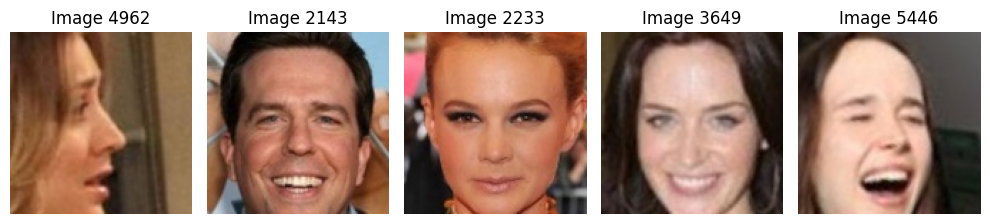

In [18]:
#Visualize 5 random images
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize random images
def visualize_images(images, n=5):
    # Generate random indices
    indices = np.random.choice(images.shape[0], n, replace=False)
    
    # Create a figure with subplots
    fig, axs = plt.subplots(1, n, figsize=(2*n, 4))
    
    for i, idx in enumerate(indices):
        # Plot images
        axs[i].imshow(images[idx].astype('uint8'))
        axs[i].set_title(f"Image {idx}")
        axs[i].axis('off')  # Hide axes
    
    plt.tight_layout()
    plt.show()

# Example: Visualize 5 random images
visualize_images(all_images, n=5)


In [19]:
# Splitting the data to training and testing and validation 
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#printing the shape of each split
print(f"X_train shape is :{X_train.shape}")
print(f"X_val shape is :{X_val.shape}")
print(f"X_test shape is :{X_test.shape}")
print(f"y_train shape is :{y_train.shape}")
print(f"y_val shape is :{y_val.shape}")
print(f"y_test shape is :{y_test.shape}")


X_train shape is :(10500, 128, 128, 3)
X_val shape is :(2250, 128, 128, 3)
X_test shape is :(2250, 128, 128, 3)
y_train shape is :(10500,)
y_val shape is :(2250,)
y_test shape is :(2250,)


In [20]:
# Normalize the Data 
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [21]:
# Vanilla AutoEncoder 0
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

input_shape = (128, 128, 3)
flat_input_shape = 128 * 128 * 3

# Encoder
encoder_input = keras.Input(shape=(flat_input_shape,), name="encoder_input")
x = layers.Dense(512, activation="relu")(encoder_input)  
x = layers.Dense(256, activation="relu")(x)  
x = layers.Dense(128, activation="relu")(x)  
encoder_output = layers.Dense(64, name="encoder_output")(x) 

encoder_va0 = keras.Model(encoder_input, encoder_output, name="encoder")
encoder_va0.summary()

# Decoder
decoder_input = keras.Input(shape=(64,), name="decoder_input")
x = layers.Dense(128, activation="relu")(decoder_input)  
x = layers.Dense(256, activation="relu")(x)  
x = layers.Dense(512, activation="relu")(x)  
decoder_output = layers.Dense(flat_input_shape, activation="sigmoid", name="decoder_output")(x)  

decoder_va0 = keras.Model(decoder_input, decoder_output, name="decoder")
decoder_va0.summary()

# Autoencoder
autoencoder_input = keras.Input(shape=input_shape, name="autoencoder_input")
flat_autoencoder_input = layers.Flatten()(autoencoder_input)
encoded = encoder_va0(flat_autoencoder_input)
decoded = decoder_va0(encoded)
reshaped_decoded = layers.Reshape(input_shape)(decoded)
Vanilla_autoencoder = keras.Model(autoencoder_input, reshaped_decoded, name="autoencoder")
Vanilla_autoencoder.summary()




Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      25,166,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_output (Dense)               │ (None, 64)                  │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,338,816 (96.66 MB)

 Trainable params: 25,338,816 (96.66 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output (Dense)               │ (None, 49152)               │      25,214,976 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,387,904 (96.85 MB)

 Trainable params: 25,387,904 (96.85 MB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ autoencoder_input (InputLayer)       │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Functional)                 │ (None, 64)                  │      25,338,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 49152)               │      25,387,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 128, 128, 3)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,726,720 (193.51 MB)

 Trainable params: 50,726,720 (193.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9149 - loss: 0.0097 - val_accuracy: 0.9089 - val_loss: 0.0103
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9167 - loss: 0.0084 - val_accuracy: 0.9135 - val_loss: 0.0103
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9206 - loss: 0.0083 - val_accuracy: 0.9111 - val_loss: 0.0103
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9166 - loss: 0.0084 - val_accuracy: 0.9119 - val_loss: 0.0102
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9183 - loss: 0.0084 - val_accuracy: 0.9127 - val_loss: 0.0103
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9167 - loss: 0.0084 - val_accuracy: 0.9118 - val_loss: 0.0117
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9176 - loss: 0.0083 - val_accuracy: 0.9104 - val_loss: 0.0108
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9186 - loss: 0.0083 - val_acc

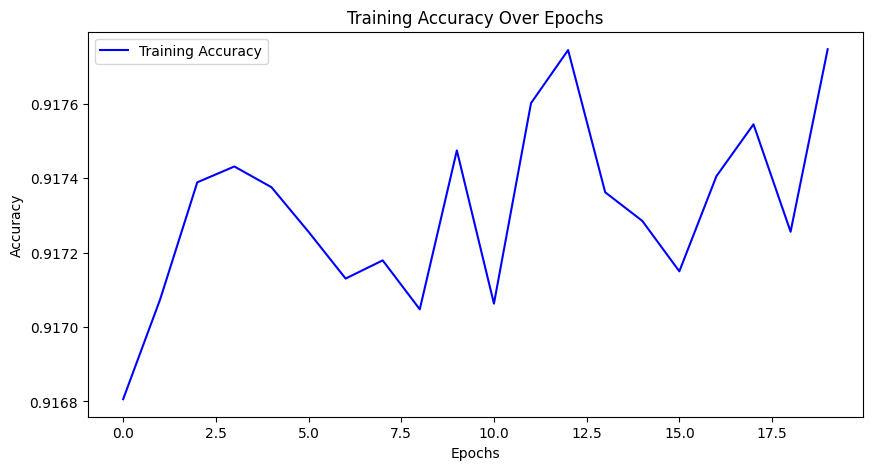

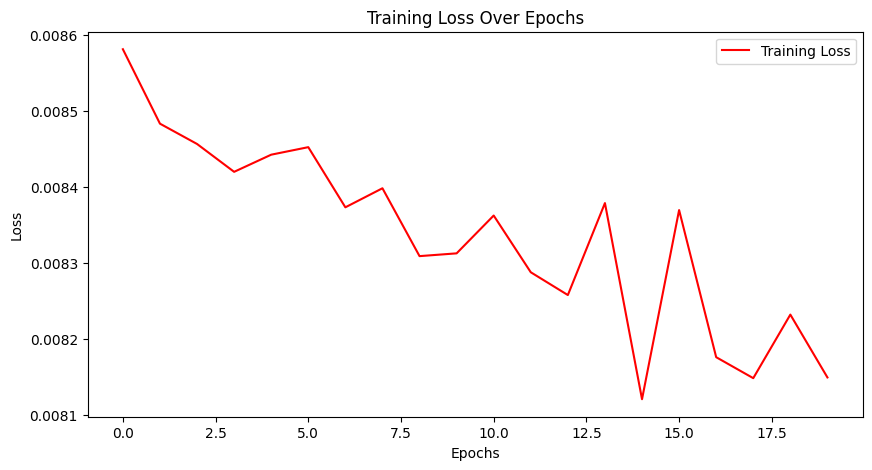

In [25]:
# Compile the Vanilla autoencoder 0 and save the Model
Vanilla_autoencoder.compile(optimizer="Nadam", loss="mse", metrics=['accuracy'])



# Reshape input data for dense layers
X_train_flat = X_train.reshape(X_train.shape[0], flat_input_shape)
X_val_flat = X_val.reshape(X_val.shape[0], flat_input_shape)
X_test_flat = X_test.reshape(X_test.shape[0], flat_input_shape)

# Train the autoencoder
num1 = Vanilla_autoencoder.fit(X_train, X_train, epochs=20, batch_size=50, validation_data=(X_val, X_val))



# Evaluate the autoencoder
loss, accuracy = Vanilla_autoencoder.evaluate(X_test, X_test)
print(f"Test Loss: {loss}")
print(f"Accuracy: {accuracy*100:.2f}%")

Vanilla_autoencoder.save("Vanilla_autoencoder_0_model.h5")

# Plot training accuracy
plt.figure(figsize=(10, 5))
plt.plot(num1.history['accuracy'], label='Training Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(num1.history['loss'], label='Training Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


In [26]:
# Variational Model 0
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras import backend as K
import numpy as np

# Input dimensions
input_shape = (128, 128, 3)
latent_dim = 64  # Dimensionality of the latent space
flattened_dim = np.prod(input_shape)  # Total number of elements in the input shape

# Encoder
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

encoder_inputs = layers.Input(shape=input_shape, name="encoder_input")
x = layers.Flatten()(encoder_inputs)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])

encoder_v0 = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder_v0.summary()

# Decoder
decoder_inputs = layers.Input(shape=(latent_dim,), name="decoder_input")
x = layers.Dense(128, activation="relu")(decoder_inputs)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(flattened_dim, activation="sigmoid")(x)  # Use flattened_dim
decoder_outputs = layers.Reshape(input_shape)(x)

decoder_v0 = Model(decoder_inputs, decoder_outputs, name="decoder")
decoder_v0.summary()

# VAE Model
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder_v0
        self.decoder = decoder_v0

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        )
        self.add_loss(kl_loss)
        return reconstructed



Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 49152)          │              0 │ encoder_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 512)            │     25,166,336 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 256)            │        131,328 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 128)            │         32,896 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_mean (Dense)            │ (None, 64)             │          8,256 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_log_var (Dense)         │ (None, 64)             │          8,256 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sampling (Sampling)       │ (None, 64)             │              0 │ z_mean[0][0],          │
│                           │                        │                │ z_log_var[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 25,347,072 (96.69 MB)

 Trainable params: 25,347,072 (96.69 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 49152)               │      25,214,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 128, 128, 3)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,387,904 (96.85 MB)

 Trainable params: 25,387,904 (96.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7640 - loss: 5835096576.0000 - val_accuracy: 0.9144 - val_loss: 9.5560
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9146 - loss: 5.8677 - val_accuracy: 0.9147 - val_loss: 2.8425
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9145 - loss: 2.4324 - val_accuracy: 0.9147 - val_loss: 1.7466
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9159 - loss: 1.6164 - val_accuracy: 0.9147 - val_loss: 1.3765
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9142 - loss: 1.2891 - val_accuracy: 0.9147 - val_loss: 1.2267
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9166 - loss: 1.1146 - val_accuracy: 0.9147 - val_loss: 1.0701
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9151 - loss: 1.0277 - val_accuracy: 0.9147 - val_loss: 1.0594
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9143 - loss: 0.9612 

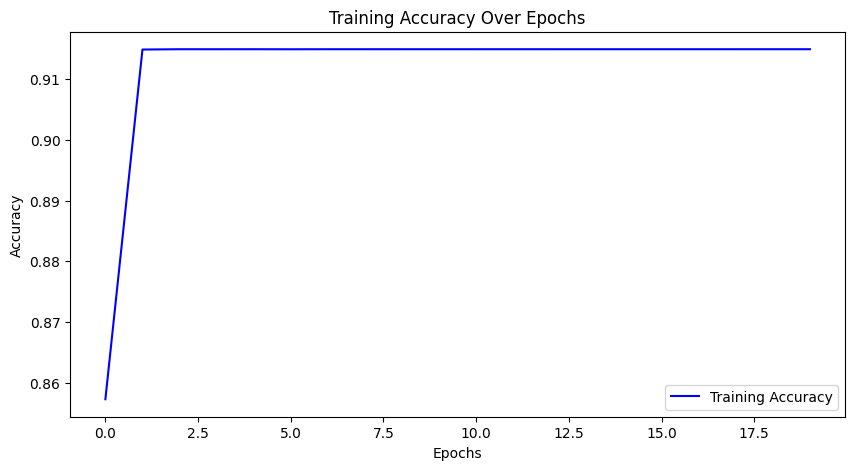

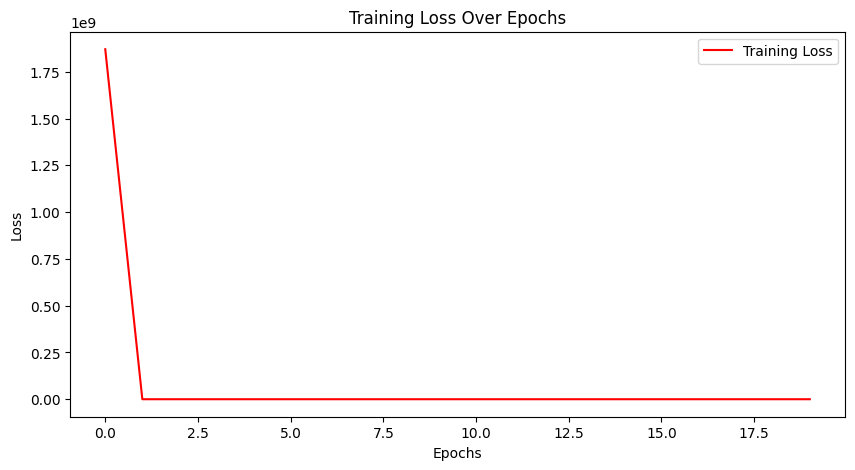

In [27]:
# Creating the VAE 0 Model

vae = VAE(encoder_v0, decoder_v0)

# Complie and save the Model of The VAE 0
vae.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

# Train the VAE
num2 = vae.fit(X_train, X_train, epochs=20, batch_size=50, validation_data=(X_val, X_val))

#print accuracy and loss
loss, accuracy = vae.evaluate(X_test, X_test)

print(f"Test Loss: {loss}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Save the trained model
vae.save("vae_model_0.h5")

# Plot training accuracy
plt.figure(figsize=(10, 5))
plt.plot(num2.history['accuracy'], label='Training Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(num2.history['loss'], label='Training Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [28]:
# Conv autoecndoer 0

import tensorflow as tf
from tensorflow.keras import layers, Model

# Input dimensions
input_shape = (128, 128, 3)  # Example input image size

# Encoder
encoder_inputs = layers.Input(shape=input_shape, name="encoder_input")
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(encoder_inputs)
x = layers.MaxPooling2D((2, 2), padding="same")(x)  # Downsample to 64x64
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)  # Downsample to 32x32
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)  # Downsample to 16x16

# Latent space
latent_space = layers.Flatten()(x)  # Flatten the output from (16, 16, 128)
latent_space = layers.Dense(64, activation="relu")(latent_space)  # Dense layer for bottleneck

# Decoder
decoder_inputs = layers.Input(shape=(64,), name="decoder_input")
x = layers.Dense(16 * 16 * 128, activation="relu")(decoder_inputs)  # Dense to reshape into 3D space
x = layers.Reshape((16, 16, 128))(x)  # Reshape to match the 3D feature map shape (16x16x128)
x = layers.Conv2DTranspose(128, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)  # Upsample to 32x32
x = layers.Conv2DTranspose(64, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)  # Upsample to 64x64
x = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)  # Upsample to 128x128

# Final output layer
decoder_outputs = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Build the encoder and decoder models
encoder_c0 = Model(encoder_inputs, latent_space, name="encoder")
decoder_c0 = Model(decoder_inputs, decoder_outputs, name="decoder")

# Build the autoencoder model
Conv_autoencoder = Model(encoder_inputs, decoder_c0(encoder_c0(encoder_inputs)), name="autoencoder")



Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Functional)                 │ (None, 64)                  │       2,190,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 128, 128, 3)         │       2,370,627 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,561,091 (17.40 MB)

 Trainable params: 4,561,091 (17.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.8741 - loss: 0.0406 - val_accuracy: 0.9118 - val_loss: 0.0162
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.9112 - loss: 0.0156 - val_accuracy: 0.9136 - val_loss: 0.0123
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.9104 - loss: 0.0118 - val_accuracy: 0.9103 - val_loss: 0.0113
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.9142 - loss: 0.0107 - val_accuracy: 0.9118 - val_loss: 0.0105
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.9155 - loss: 0.0104 - val_accuracy: 0.9100 - val_loss: 0.0103
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.9166 - loss: 0.0100 - val_accuracy: 0.9146 - val_loss: 0.0102
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.9171 - loss: 0.0099 - val_accuracy: 0.9210 - val_loss: 0.0100
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.9173 - loss: 0.0097 - 

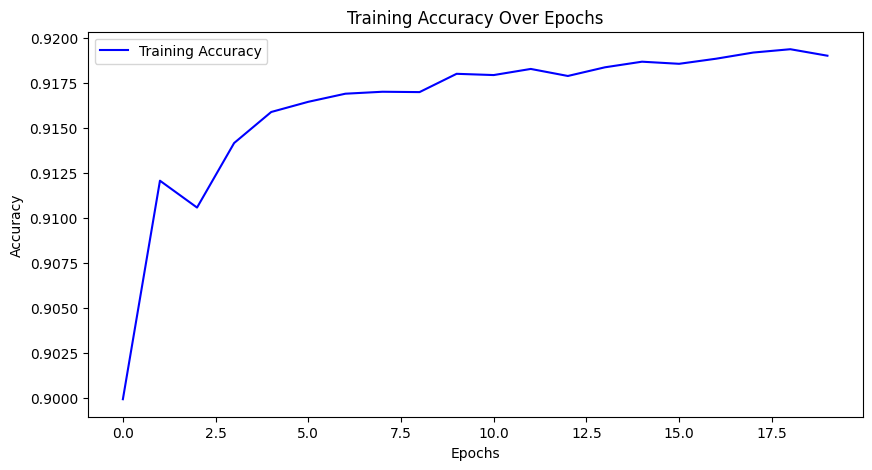

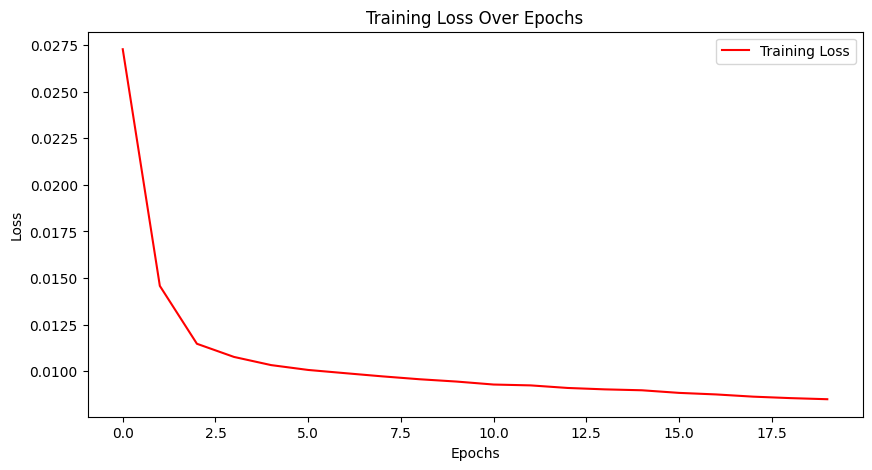

In [29]:
# Compile the model of the CONV 0
Conv_autoencoder.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

# Summary of the model architecture
Conv_autoencoder.summary()


# Train the model
num3 = Conv_autoencoder.fit(X_train, X_train, epochs=20, batch_size=50, validation_data=(X_val, X_val))

loss, accuracy = Conv_autoencoder.evaluate(X_test, X_test)

print(f"Test Loss: {loss}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Save the trained model
Conv_autoencoder.save("conv_autoencoder.h5")

# Plot training accuracy
plt.figure(figsize=(10, 5))
plt.plot(num3.history['accuracy'], label='Training Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(num3.history['loss'], label='Training Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [30]:
X_test_reshaped = X_test.reshape(-1, 49152)
X_train_reshaped = X_train.reshape(-1, 49152)
print(f"X_test_reshaped is {X_test_reshaped.shape}")
print(f"X_train_reshaped is {X_train_reshaped.shape}")

X_test_reshaped is (2250, 49152)
X_train_reshaped is (10500, 49152)


feature_vectors shape : (10500, 64)


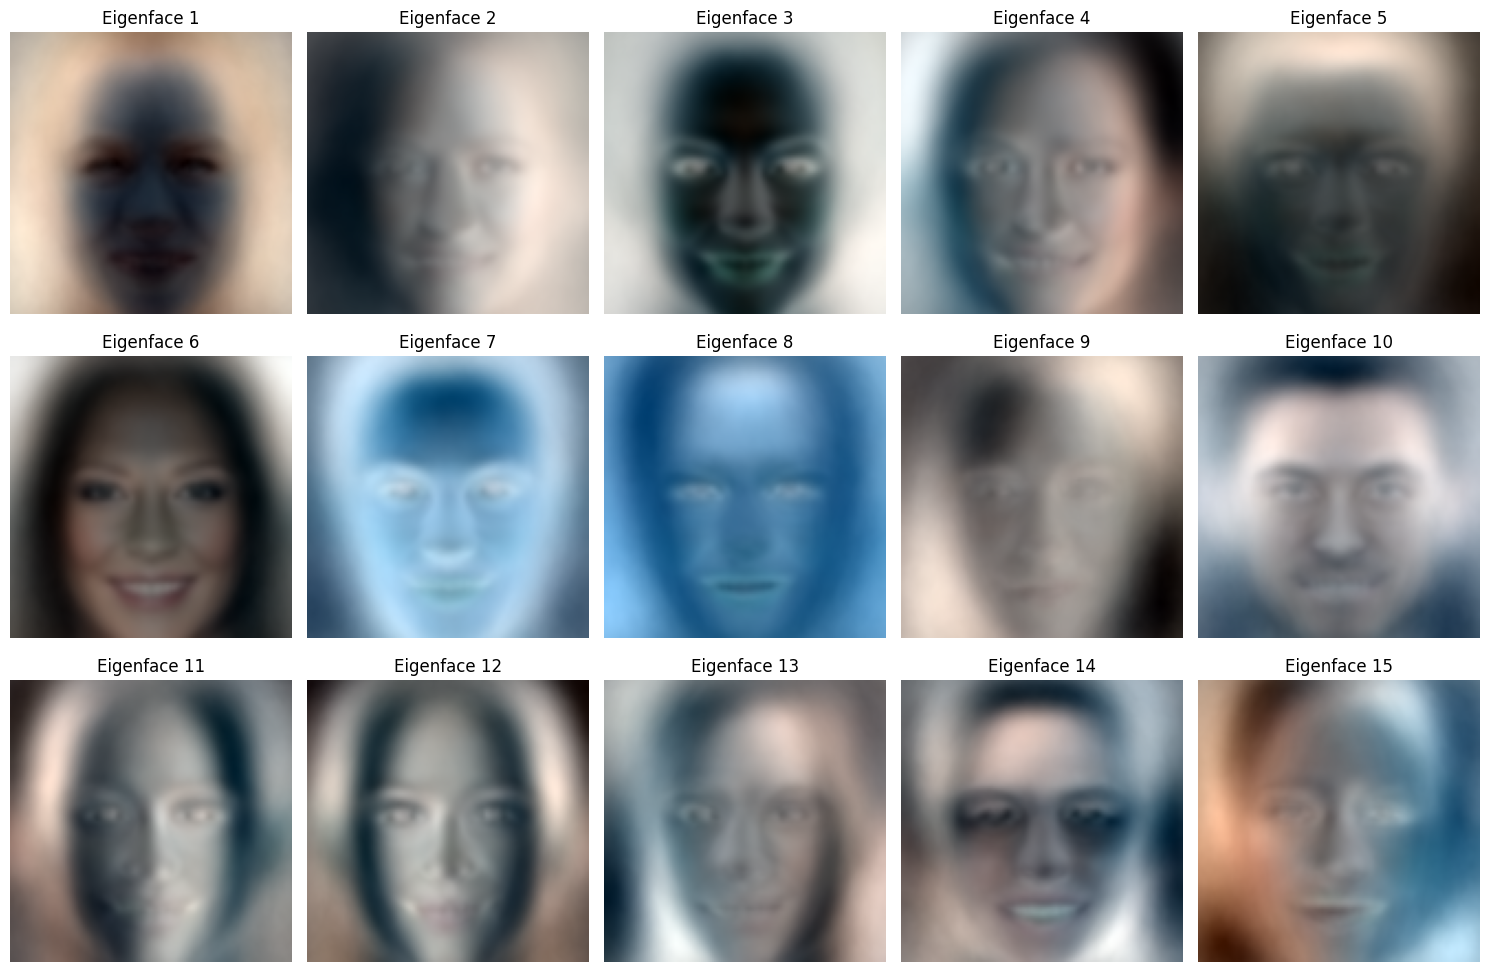

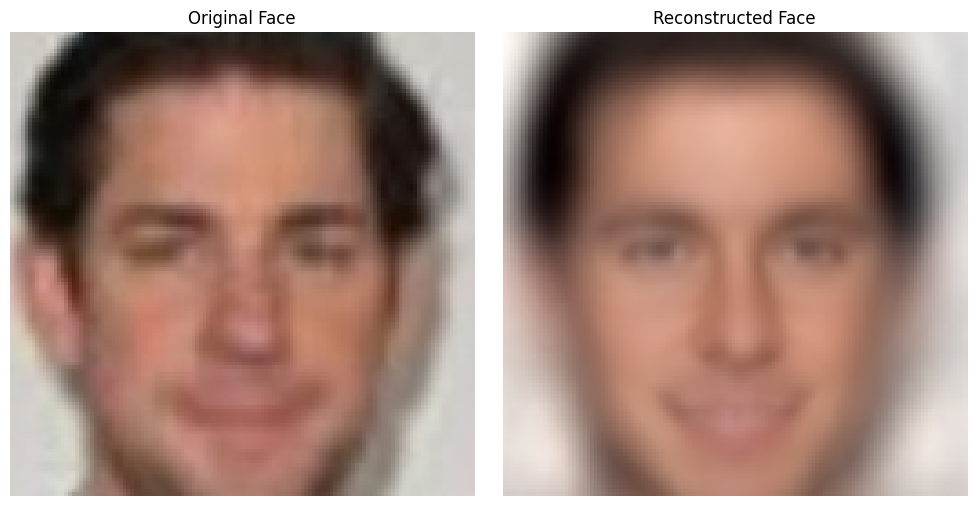

In [31]:
# Eigen Faces Implementation 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA




# Step 1: Perform PCA for eigenfaces
n_components = 64  # Number of eigenfaces/features to extract
pca = PCA(n_components=n_components, whiten=True, random_state=42)
pca.fit(X_train_reshaped)
feature_vectors = pca.transform(X_train_reshaped) # Project images onto eigenface space
print(f"feature_vectors shape : {feature_vectors.shape}")

# Step 2: Visualize eigenfaces
# Reshape eigenfaces back to image dimensions (128, 128, 3)
eigenfaces = pca.components_.reshape((n_components, X_train.shape[1], X_train.shape[2], X_train.shape[3]))

fig, axs = plt.subplots(3, 5, figsize=(15, 10))  # Display top 15 eigenfaces
for i in range(15):
    # Scale eigenfaces for visualization
    eigenface = (eigenfaces[i] - eigenfaces[i].min()) / (eigenfaces[i].max() - eigenfaces[i].min())
    axs[i // 5, i % 5].imshow(eigenface)
    axs[i // 5, i % 5].set_title(f"Eigenface {i+1}")
    axs[i // 5, i % 5].axis('off')
plt.tight_layout()
plt.show()

# Optional: Reconstruct a sample image to show PCA effect
example_face = X_train_reshaped[0]  # Select an example image
example_face_pca = pca.transform([example_face])  # Project onto eigenface space
reconstructed_face = pca.inverse_transform(example_face_pca)  # Reconstruct the face

# Reshape reconstructed face back to image dimensions
reconstructed_face = reconstructed_face.reshape(X_train.shape[1], X_train.shape[2], X_train.shape[3])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(X_train[0])  # Original RGB image
axs[0].set_title("Original Face")
axs[0].axis('off')

# Normalize reconstructed face for visualization
reconstructed_face = (reconstructed_face - reconstructed_face.min()) / (reconstructed_face.max() - reconstructed_face.min())
axs[1].imshow(reconstructed_face)
axs[1].set_title("Reconstructed Face")
axs[1].axis('off')

plt.tight_layout()
plt.show()


In [32]:
# Getting the features vectors out of different encoders
test_feature_vectors_va0 = np.array(encoder_va0.predict(X_test_reshaped))
z_mean_test, z_log_var_test, z_test = np.array(encoder_v0.predict(X_test))
test_feature_vectors_c0 = np.array(encoder_c0.predict(X_test))
test_feature_vectors_Eigen = np.array(pca.transform(X_test_reshaped))

# Store feature vectors of training data 
train_feature_vectors_va0 = np.array(encoder_va0.predict(X_train_reshaped))
z_mean_train, z_log_var_train, z_train = np.array(encoder_v0.predict(X_train))
train_feature_vectors_c0 = np.array(encoder_c0.predict(X_train))
train_feature_vectors_Eigen = np.array(pca.transform(X_train_reshaped))


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [33]:
print(f"train_feature_vectors_va0 is {train_feature_vectors_va0.shape}")
print(f"z_mean_train is {z_mean_train.shape}")
print(f"train_feature_vectors_c0 is {train_feature_vectors_c0.shape}")
print(f"train_feature_vectors_Eigen is {train_feature_vectors_Eigen.shape}")

train_feature_vectors_va0 is (10500, 64)
z_mean_train is (10500, 64)
train_feature_vectors_c0 is (10500, 64)
train_feature_vectors_Eigen is (10500, 64)


# Classification Using euclidean_classifier

In [34]:
# euclidean_classifier

import numpy as np
from scipy.spatial.distance import cdist

def euclidean_classifier(train_features, train_labels, test_features):
    # Compute the Euclidean distances between each test feature and all training features
    distances = cdist(test_features, train_features, metric='euclidean')
    
    # For each test image, find the index of the closest (minimum distance) training feature vector
    predicted_labels = []
    for dist in distances:
        min_distance_index = np.argmin(dist)  # Index of minimum distance
        predicted_labels.append(train_labels[min_distance_index])  # Assign label of the closest training image
    
    return np.array(predicted_labels)




In [35]:
# Use the Euclidean classifier to classify the test images
predicted_labels_va0 = euclidean_classifier(train_feature_vectors_va0, y_train, test_feature_vectors_va0)
predicted_labels_v0 = euclidean_classifier(z_mean_train, y_train, z_mean_test)
predicted_labels_c0 = euclidean_classifier(train_feature_vectors_c0, y_train, test_feature_vectors_c0)
predicted_labels_Eigen = euclidean_classifier(train_feature_vectors_Eigen, y_train, test_feature_vectors_Eigen)

In [36]:
# Calculate recognition accuracy
from sklearn.metrics import accuracy_score

# Assuming you have the true labels for your test set
accuracy_va0 = accuracy_score(y_test, predicted_labels_va0)
accuracy_v0 = accuracy_score(y_test, predicted_labels_v0)
accuracy_c0 = accuracy_score(y_test, predicted_labels_c0)
accuracy_Eigen = accuracy_score(y_test, predicted_labels_Eigen)

print(f"Recognition accuracy out of vanilla : {accuracy_va0 * 100:.2f}%")
print(f"Recognition accuracy out of VAE: {accuracy_v0 * 100:.2f}%")
print(f"Recognition accuracy out of CONV: {accuracy_c0 * 100:.2f}%")
print(f"Recognition accuracy out of Eigen: {accuracy_Eigen * 100:.2f}%")


Recognition accuracy out of vanilla : 24.98%
Recognition accuracy out of VAE: 13.64%
Recognition accuracy out of CONV: 26.18%
Recognition accuracy out of Eigen: 32.89%


# Classification using deep nueral network

In [55]:
#Define the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(train_feature_vectors_va0.shape[1],)),  # Input layer
    tf.keras.layers.Dense(128, activation='relu'),             # Hidden layer 1
    tf.keras.layers.Dense(64, activation='relu'),              # Hidden layer 2
    tf.keras.layers.Dense(len(set(y_train)), activation='softmax')  # Output layer (number of classes)
])




Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0405 - loss: 4.3457 - val_accuracy: 0.1342 - val_loss: 3.6134
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1684 - loss: 3.3968 - val_accuracy: 0.2018 - val_loss: 3.1730
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2607 - loss: 2.9348 - val_accuracy: 0.2369 - val_loss: 3.0304
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3069 - loss: 2.7130 - val_accuracy: 0.2591 - val_loss: 2.9576
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3440 - loss: 2.5677 - val_accuracy: 0.2724 - val_loss: 2.8927
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3627 - loss: 2.4407 - val_accuracy: 0.2902 - val_loss: 2.8480
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3723 - loss: 2.3930 - val_accuracy: 0.2871 - val_loss: 2.8252
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3946 - loss: 2.2879 - val_accu

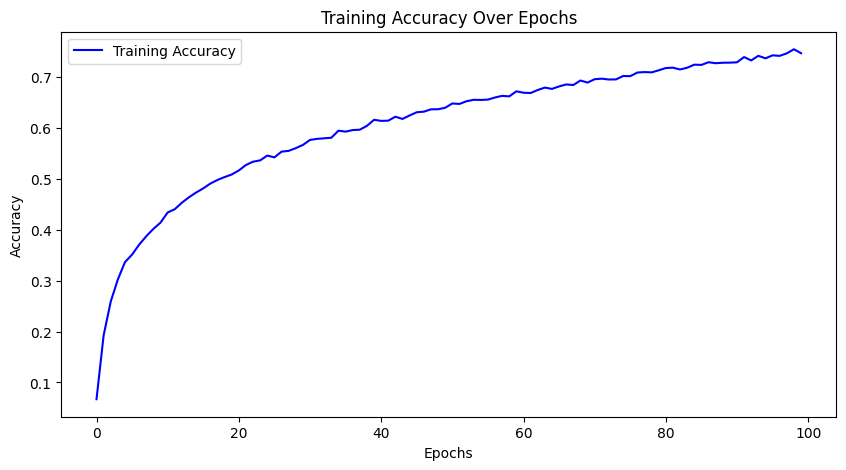

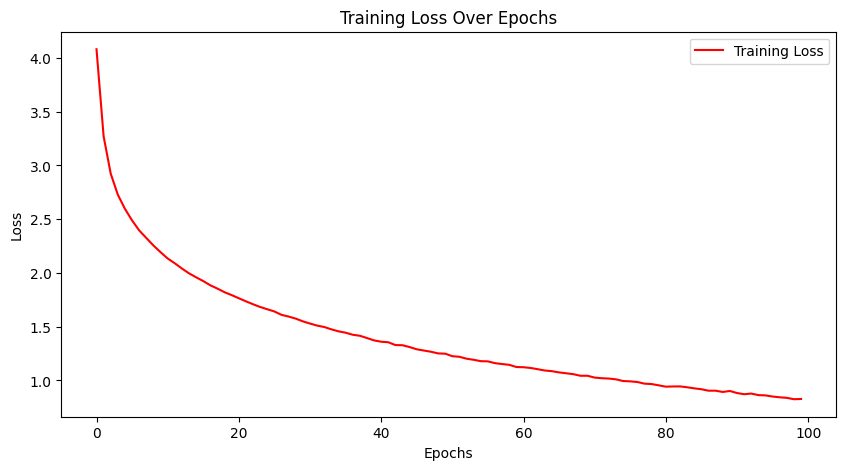

In [56]:
# Evaluate the model for va0

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_va0 = model.fit(train_feature_vectors_va0, y_train, epochs=100, batch_size=50, validation_data=(test_feature_vectors_va0, y_test))
y_pred = model.predict(test_feature_vectors_va0)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test Accuracy: {accuracy:.2f}")


# Plot training accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_va0.history['accuracy'], label='Training Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history_va0.history['loss'], label='Training Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()



Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0234 - loss: 4.3863 - val_accuracy: 0.0671 - val_loss: 3.9735
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0729 - loss: 3.8936 - val_accuracy: 0.0902 - val_loss: 3.8174
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1034 - loss: 3.7351 - val_accuracy: 0.1089 - val_loss: 3.7393
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1257 - loss: 3.6247 - val_accuracy: 0.1178 - val_loss: 3.6930
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1365 - loss: 3.5660 - val_accuracy: 0.1204 - val_loss: 3.6552
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1462 - loss: 3.5069 - val_accuracy: 0.1293 - val_loss: 3.6234
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1531 - loss: 3.4350 - val_accuracy: 0.1244 - val_loss: 3.6029
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1678 - loss: 3.4026 - val_accu

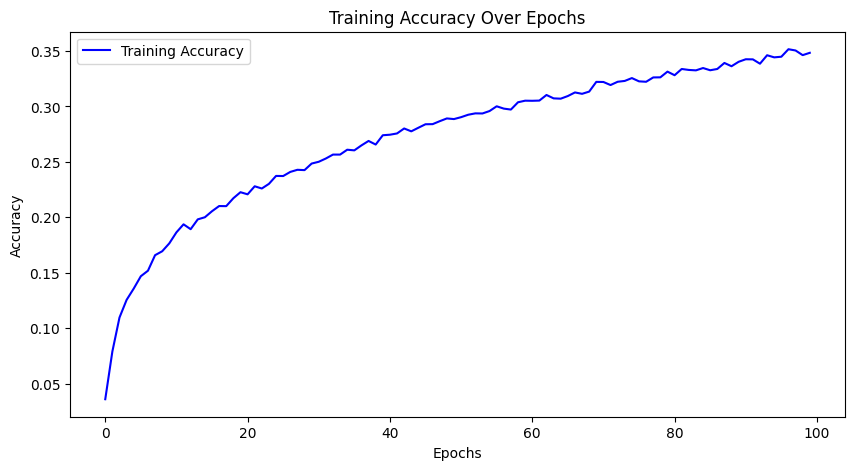

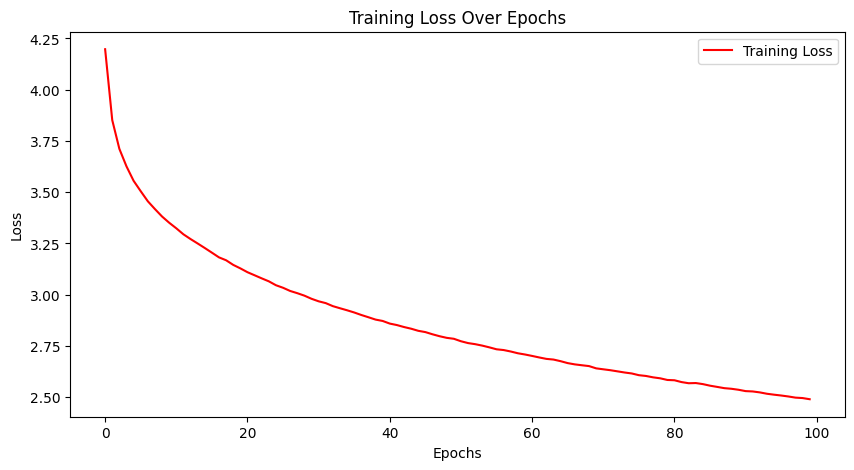

In [57]:
# Evaluate the model for v0

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_v0 = model.fit(z_mean_train, y_train, epochs=100, batch_size=50, validation_data=(z_mean_test, y_test))
y_pred = model.predict(z_mean_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_v0.history['accuracy'], label='Training Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history_v0.history['loss'], label='Training Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()



Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0164 - loss: 27.6273 - val_accuracy: 0.0227 - val_loss: 4.7967
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0155 - loss: 4.5667 - val_accuracy: 0.0191 - val_loss: 4.3697
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0216 - loss: 4.3136 - val_accuracy: 0.0204 - val_loss: 4.2965
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0267 - loss: 4.2467 - val_accuracy: 0.0271 - val_loss: 4.2367
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0327 - loss: 4.1792 - val_accuracy: 0.0324 - val_loss: 4.1606
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0474 - loss: 4.0827 - val_accuracy: 0.0476 - val_loss: 4.0605
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0521 - loss: 3.9746 - val_accuracy: 0.0560 - val_loss: 3.9676
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0604 - loss: 3.8584 - val_acc

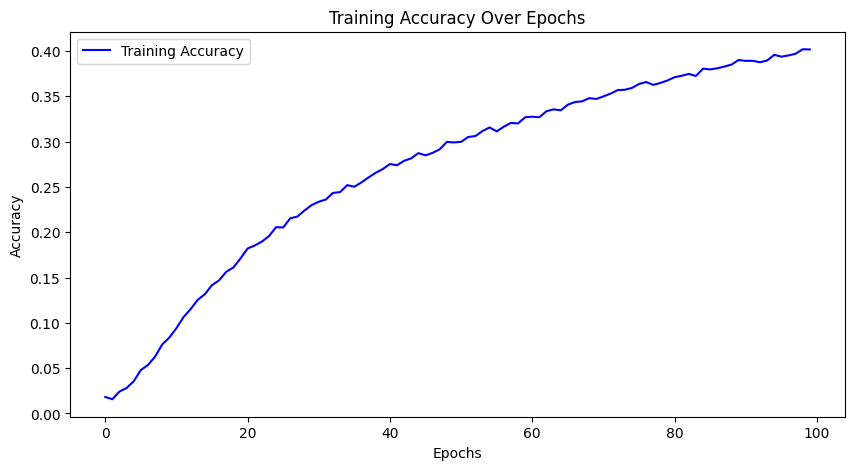

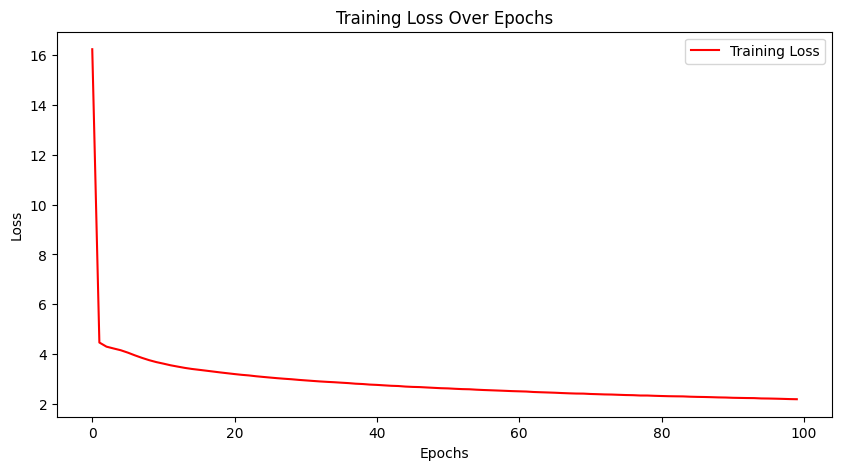

In [58]:
# Evaluate the model for c0

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_c0 = model.fit(train_feature_vectors_c0, y_train, epochs=100, batch_size=50, validation_data=(test_feature_vectors_c0, y_test))
y_pred = model.predict(test_feature_vectors_c0)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_c0.history['accuracy'], label='Training Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history_c0.history['loss'], label='Training Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0136 - loss: 93.7548 - val_accuracy: 0.0160 - val_loss: 20.6965
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0214 - loss: 13.8609 - val_accuracy: 0.0218 - val_loss: 7.1975
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0195 - loss: 6.1193 - val_accuracy: 0.0200 - val_loss: 5.3652
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0222 - loss: 5.0219 - val_accuracy: 0.0231 - val_loss: 4.8346
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0261 - loss: 4.5867 - val_accuracy: 0.0231 - val_loss: 4.6088
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0283 - loss: 4.4213 - val_accuracy: 0.0258 - val_loss: 4.4920
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0305 - loss: 4.2621 - val_accuracy: 0.0227 - val_loss: 4.4204
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0291 - loss: 4.2185 - val_a

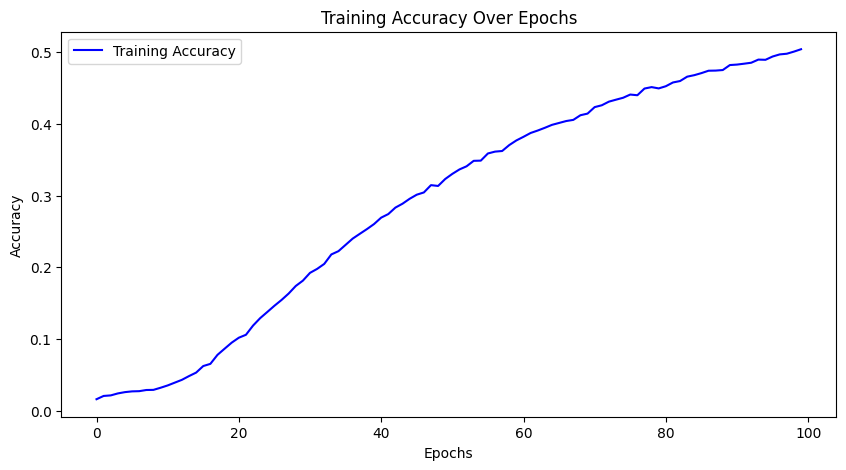

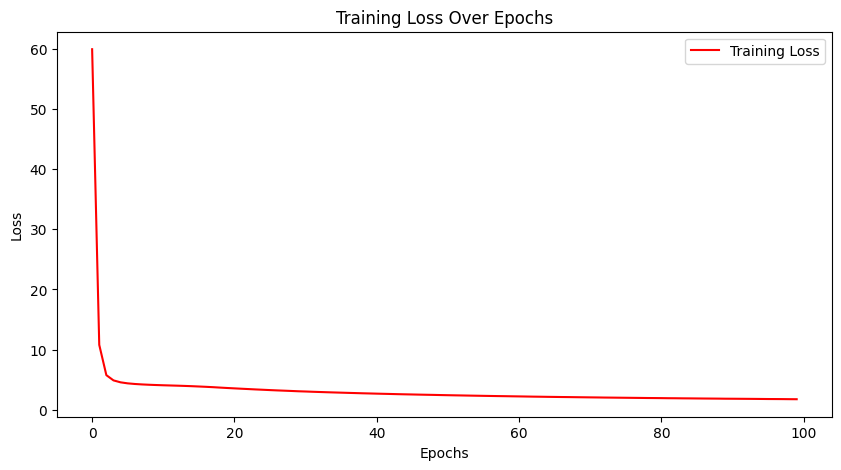

In [59]:
# Evaluate the model for Eigen

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_Eigen = model.fit(train_feature_vectors_Eigen, y_train, epochs=100, batch_size=50, validation_data=(test_feature_vectors_Eigen, y_test))
y_pred = model.predict(test_feature_vectors_Eigen)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_Eigen.history['accuracy'], label='Training Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history_Eigen.history['loss'], label='Training Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()